## Statistische Hypothesen und Statistische Tests





In [131]:
from __future__ import print_function
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math as m
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

In [132]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 90%;
}
</style>

## Simulation eines A/B Tests

Die folgenden Zellen erlauben uns die Durchführung eines A/B Tests zu simulieren. 
* Die Ausführung der übernächsten Zelle erzeugt zwei Stichproben basierend der vorgegebenen Wahrscheinlichkeit p und der Stichprobengrösse
* Jede Ausführung per `STRG-ENTER` erzeugt neue zufällig verteilte Stichproben.

Folgender Link erlaubt Ihnen Zugriff auf das verwendete Notebook: https://bit.ly/2UNNjdg


## Erzeugung zufälliger Stichproben

```python
rsv_binom_A = stats.binom.rvs(size=1000, n=100, p=0.5)
rsv_binom_B = stats.binom.rvs(size=1000, n=100, p=0.502)
t_test = stats.ttest_ind(rvs_binom_A,rsv_binom_B)
```

In [1107]:
rvs_binom_A = stats.binom.rvs(size=1000, n=100, p=0.5)
rvs_binom_B = stats.binom.rvs(size=1000, n=100, p=0.502)

ttest = stats.ttest_ind(rvs_binom_A,rvs_binom_B)
z1, p_value1 = sm.stats.proportions_ztest([rvs_binom_A.sum(), rvs_binom_B.sum()], [100000, 100000])

print("t-test p:" + '{:.4f}'.format(ttest.pvalue))
print("proportional ztest p:" + '{:.4f}'.format(p_value1))
if p_value1 < 0.05:
    print('Significant p-value found:' + '{:.3f}'.format(p_value1))
    matrix_twosample = [
    ['', 'total conversions', 'mean', 'std'],
    ['Group A', '{:.0f}'.format(rvs_binom_A.sum()), '{:.2f}'.format(rvs_binom_A.mean()), '{:.2f}'.format(rvs_binom_A.std())],
    ['Group B', '{:.0f}'.format(rvs_binom_B.sum()), '{:.2f}'.format(rvs_binom_B.mean()), '{:.2f}'.format(rvs_binom_B.std())]
    ]
    twosample_table = FF.create_table(matrix_twosample, index=True)
    iplot(twosample_table, filename='twosample-table')

t-test p:0.0046
proportional ztest p:0.0053
Significant p-value found:0.005


## Graph Generierung der Stichproben A und B

Führen Sie die folgende Zelle mit `STRG-ENTER` aus um die zuletzt erzeugten Stichproben A und B als Graph abzubilden.

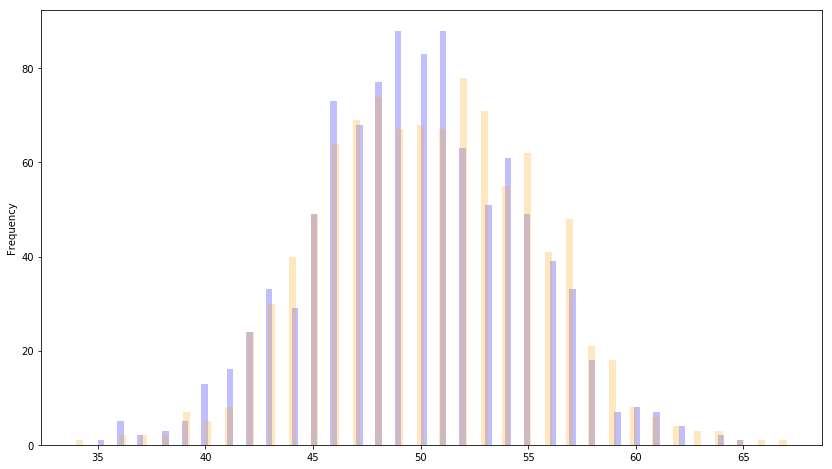

In [1108]:
fig, ax = plt.subplots(figsize=(14,8))
pd.Series(rvs_binom_A).plot(kind="hist", bins = 100, alpha=0.25, color = 'blue')
pd.Series(rvs_binom_B).plot(kind="hist", bins = 100, alpha=0.25, color = 'orange')

## Berechnung der Test Statistik $t$

$t = \frac{\text{Differenz der Stichprobenmittelwerte}}{\text{Standardfehler der Differenz}}$

Für unterschiedliche Varianz der Stichproben:

$t = \frac{\bar{x_A} - \bar{x_B}}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}$



| Gruppe | N       | mittelwert | standardabweichung |
|--------|---------|------------|--------------------|
| A      | 100.000 | 50,31      | 5,04               |
| B      | 100.000 | 49,75      | 4,88               |

$t = \frac{\bar{x_A} - \bar{x_B}}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}$


In [1046]:
(49.75-50.31)/m.sqrt(m.pow(5.04,2)/1000+m.pow(4.88,2)/1000)


-2.5242645609111762

Welcher p-Wert ist verbunden mit der Test-Statistik.
Ablesen in einer Tabelle für T-Test Statistiken:

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm

Übung: Generieren Sie weitere zufällig erhobene Stichproben und berechnen Sie die t-Statistik.

## Typ I und Typ II Fehler

### Typ I Fehler (engl. "False Positive"):

* Typ I Fehler tritt ein wenn wir eine wahre Nullhypothese verwerfen (irrtümlicher Glaube an einen Zusammenhang, der tatsächlich nicht existiert).
* Die Wahrscheinlichkeit für einen Typ I Fehler entspricht $\alpha$. Die Akzeptanz von $\alpha = 0.05$ entspricht einer Wahrscheinlichkeit von $5\%$ einen Typ I Fehler zu begehen.

###  Typ II Fehler (engl. "False Negative"):
    
* Typ II Fehler Wahrscheinlichkeit eine tatsächlich falsche Nullhypothese nicht zu verwerfen (irrtümlicher Glaube, dass kein Zusammenhang existiert, wo tatsächlich einer besteht)
* Die Wahrscheinlichkeit für einen Typ II Fehler entspricht $P(Typ2Fehler|Ha)=\beta$

## Zusammenhang Zwischen Typ I, Typ II und Signifikanzniveau $\alpha$




Text(0, 0.02, 'Typ II Fehler')

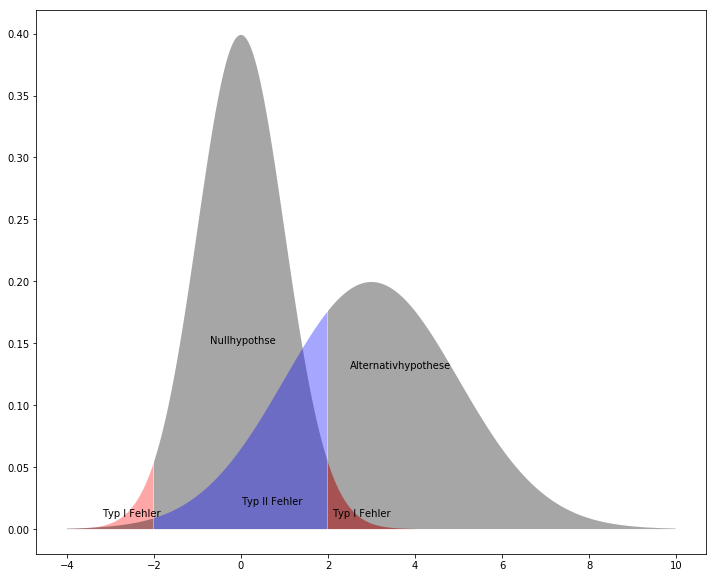

In [839]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='black',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='black',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='black',
                 alpha=0.35)

plt.text(x=-0.7, y=0.15, s= "Nullhypothse")
plt.text(x=2.5, y=0.13, s= "Alternativhypothese")
plt.text(x=2.1, y=0.01, s= "Typ I Fehler")
plt.text(x=-3.2, y=0.01, s= "Typ I Fehler")
plt.text(x=0, y=0.02, s= "Typ II Fehler")

## Welche Faktoren beeinflussen den Signifikanztest

* Effekt (Grösse der Differenz der Mittelwerte)
* Stichprobengrösse

$t = \frac{\bar{x_A} - \bar{x_B}}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}$



In [836]:
def plot_pmf(samples):
    fig, ax = plt.subplots(figsize=(12,6)) 
    xA = np.linspace(1, samples, samples)
    yA = stats.binom(samples, 0.50).pmf(xA)
    ax.bar(xA, yA, alpha=0.5)
    xB = np.linspace(1, samples, samples)
    yB = stats.binom(samples, 0.6).pmf(xB)
    ax.bar(xB, yB, alpha=0.4)
    plt.xlabel('converted')
    plt.ylabel('probability')
    
interact(plot_pmf,  samples=widgets.IntSlider(min=10,max=1000,step=100,value=10, continuous_update=False))

interactive(children=(IntSlider(value=10, continuous_update=False, description='samples', max=1000, min=10, st…

<function __main__.plot_pmf(samples)>

## p-Wert ist nicht die Wahrscheinlichkeit der Nullhypothese

Es ist eine berechnete Wahrscheinlichkeit basierend auf der Verteilung von Werten.

Dies wird auch illustriert durch den Einsatz von statistischen Tests in Natural Language Processing zur Bewertung der Wahrscheinlichkeiten des gemeinsamen Auftretens von Wörtern.



## Statistische Signifikanz != Praktische Signifikanz

Mark Sanderson SIGIR 2010: Do User Preferences and Evaluation Measures Line Up?[5]

* "P@10 poorly models user preferences"
* Limited impact of small $\Delta$ of measures





## Statistische Signifikanz != Praktische Signifikanz

Auch andere Faktoren wie der praktische "Impact" und Kosten sind hier zu berücksichtigen.

* Kosten von Keywords bei online Werbung
* Umsetzbarkeit, Skalierbarkeit, Generalisierbarkeit


## Hypothesen
<HTML><img src="AblaufEnde.png" width="812"/><HTML/>

## Statistisches Testen - Cutting Edge?

Wissenschaftliche Studie bei ACL 2018.

* ACL ist eine der bedeutendsten Konferenzen im Bereich NLP
* Studie untersucht die Nutzung statistischer Tests akzeptierter Papers bei ACL 2017


## Statistisches Testen - Cutting Edge?

ACL 2018 Paper: The Hitchhiker’s Guide to Testing Statistical Significance in Natural
Language Processing [6].

| papers ACL 2017 | papers that do report sign. | papers that do not report sign. |
|-----------------|---------------------------------|---------------------------------|
| 180             | 63                              | 117                             |
| 100%            | 35%                             | 65%    |                             

| papers that reported  | use wrong test | do not mention which test  | papers that correctly applied sign. |
|-----------------------|----------------|----------------------------|-------------------------------------|
| 63                    | 6              | 21                         | 36                                  |
| 100%                  | 9,5%           | 33,3%                      | 20% of total conf.                  |

## Praktischer Nutzen

Praktisch ist die Umsetzung nicht in allen Situationen moeglich.
* Messbarkeit
* Kosten von Messungen
* Bereitschaft fuer Messungen




## Praktischer Nutzen

Es ist immer besser die Statistiken der Stichproben in Erwägung zu ziehen
* Streuung von Stichproben 
* Statistiken der Stichprobe
* Design der Erhebung
* Auch keine Ablehnung der Nullhypothese ist ein wertvolles Ergebnis

## Praktischer Nutzen

Bedeutung statischer Tests ist enorm gestiegen
* A/B Testing Praxis
* ACL Paper als Indikation
* Teil der Veränderung des Machine Learning and AI


## Referenzen
* [1] History of A/B Testing: https://www.wired.com/2012/04/ff-abtesting/
* [2] Summary of A/B Testing: https://hbr.org/2017/09/the-surprising-power-of-online-experiments
* [3] Produkt-integriertes A/B Testing
     * https://developer.amazon.com/it/blogs/tag/AB+Testing
     * https://www.facebook.com/business/help/296679177443789
     * https://www.facebook.com/business/help/165866720571247?helpref=faq_content#
* [4] Beispiele für in-house A/B Testing
     * https://medium.com/wolfgangbremer/amazon-is-the-king-of-a-b-testing-f46008e3b528
     * https://ai.stanford.edu/~ronnyk/ExPThinkWeek2009Public.pdf
* [5] http://marksanderson.org/publications/my_papers/SIGIR2010.pdf
* [6] https://ie.technion.ac.il/~roiri/papers/ACL-2018-sig-cr.pdf
    
